# Exploring Education level by Age

This notebook will go deeper into the US Census data for California, exploring educational attainment by age in more detail.
Along the way, we will improve our visualizations with some fun and useful customizations in the following areas:
* Color choice and plot styling
* Legend formatting
* Axes ticks and stair plots
* Annotations

More importantly, we will use these customizations as an exercise
in understanding how Pandas uses Matplotlib under the hood,
navigating documentation,
and mixing and matching effectively between libraries.

## Load data

In the first notebook, we had a very simple data frame with one `x` column (age) and one `y` column (% of CA population with an advanced degree).
Now, we'll look at more complete census data to break down the percent of each age group at a range of different education levels.
See the notebooks in the `census-data` folder for more details on how this data was obtained.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('census-data/education_by_age.csv', index_col='age')
df.head()

,Advanced degree,Bachelor's degree,High School diploma,No diploma,Some college
age,,,,,
18 to 24 years,0.738296,9.987076,30.384257,11.036496,47.853875
25 to 34 years,10.713565,25.769991,21.471418,10.963738,31.081288
35 to 44 years,14.623810,22.270633,19.605535,16.824875,26.675147
45 to 64 years,12.504740,19.669680,20.241137,18.421095,29.163347
65 years and over,13.672428,17.787053,20.696619,19.705613,28.138288


## Default bar chart

We already have the data in a "wide" format, so we can ask Pandas to plot a bar chart for each level very conveniently.
However, this is... not ideal.

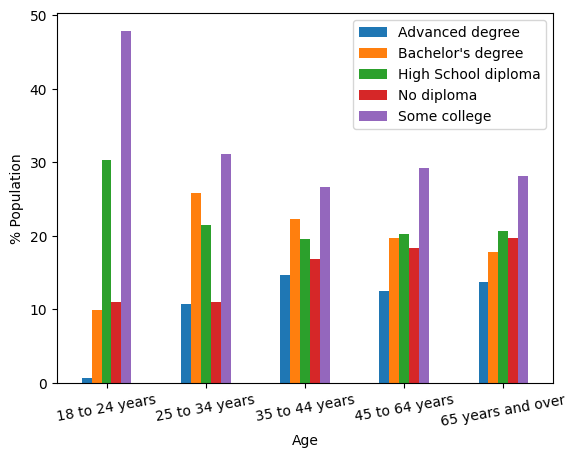

In [3]:
df.plot(kind='bar', rot=10, xlabel='Age', ylabel='% Population')
plt.savefig('plots/part-2-before.png', bbox_inches='tight')

## Stacking and sorting categories

The first easy change we can make is using a stacked bar chart.
Stacking makes a lot of sense here, since each category should add up to 100,
and you probably didn't need this notebook to tell you that.
We'll also set the `y` limits explicitly to go from 0 to 100.

The categories also have an implicit ordering, so we should sort them.
Later in this notebook, we will loop over the sorted list by hand,
but it's actually pretty convenient to get Pandas to do this for you.
It just takes a dab of ordered `CategoricalIndex` magic.

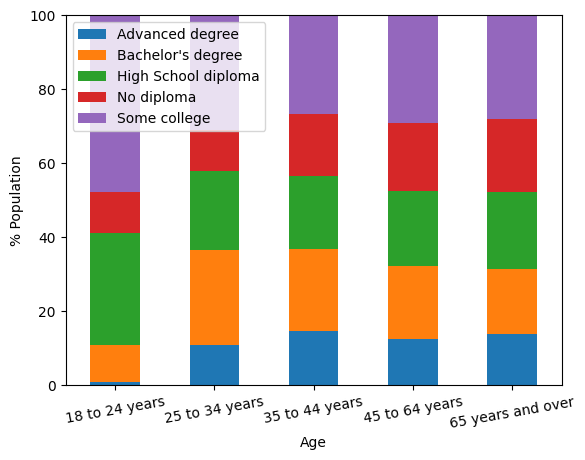

In [4]:
education_sorted = [
    "Advanced degree",
    "Bachelor's degree",
    "Some college",
    "High School diploma",
    "No diploma"
]

# Make a copy of the dataframe and sort it, so we can see both sorted and unsorted side-by-side
df2 = pd.DataFrame(df, copy=True)
df2.columns = pd.CategoricalIndex(df2.columns.values, ordered=True, categories=education_sorted)
df2 = df2.sort_index(axis=1)

# Try first with the unsorted dataframe, then with the sorted one
df.plot(kind='bar', stacked=True, rot=10, ylim=(0,100), xlabel='Age', ylabel='% Population');
#df2.plot(kind='bar', stacked=True, rot=10, xlabel='Age', ylabel='% Population');

## Color choice for ordinal categories

This is better, but the color choices don't really make sense either.
The different colors are distracting, and don't convey the sense of ordering.
Two things that would help:
* Choosing a sequential color scheme
* Reversing the legend order to match the plotting order

Color choices and representations (e.g. named colors vs RGB vs hex) are a huge topic,
well worth getting familiar with.
The Matplotlib docs have a succinct reference of the different options available: https://matplotlib.org/stable/tutorials/colors/colors.html.

For larger numbers of colors, especially mapping continuous variables to color,
we get into the topic of colorbars - we'll get to those in the next notebook.

There are a lot of free online tools for color palette generation.
As a bonus exercise, experiment with these to define your own color palette for the following cells.
Here are two options I found useful, but there are many more out there:
* https://colorbrewer2.org
* https://www.w3schools.com/colors/colors_mixer.asp (and other options on that site)

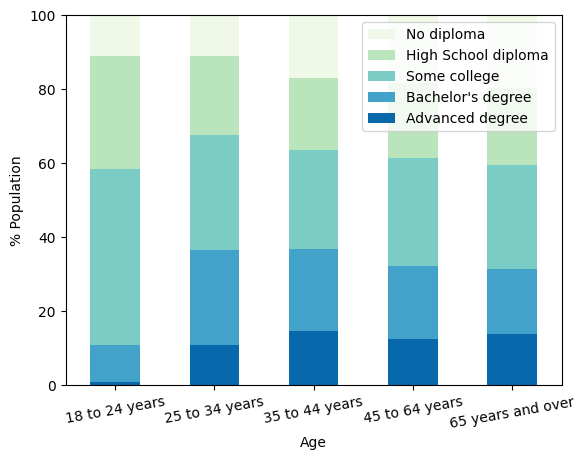

In [5]:
# Colors from https://colorbrewer2.org/#type=sequential&scheme=GnBu&n=5
my_colors = ['#f0f9e8','#bae4bc','#7bccc4','#43a2ca','#0868ac']
my_colors.reverse()

# Comment out the last two kwargs to see the individual changes before-and-after
df2.plot(
    kind = 'bar', stacked = True, rot = 10, ylim=(0,100),
    xlabel = 'Age', ylabel = '% Population',
    color = my_colors,
    legend = 'reverse'
);

### An aside about navigating documentation

If you are trying to make the above changes to color scheme on your own,
how do you know to pass the `color` argument?
It seems intuitive after the fact, but why not `c` or `colors`?
Questions like this are a good reason to get comfortable with explicitly plotting in Matplotlib,
even if you eventually control most of your plotting with `df.plot()`.

Notice that the
[pandas documentation for `df.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)
says nothing about the `color` argument.
Part of the reason this method is so convenient is that it will automatically pass any extra arguments on to the underlying Matplotlib method.
(To quote the docs: "`**kwargs`: Options to pass to matplotlib plotting method.")

To know what arguments are available, you can reference the
[matplotlib docs for `plt.bar()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html),
where you will find `color` listed under "Other parameters".
If you are used to doing a lot of tab-complete in your notebooks,
this dynamic might be reason enough to switch (at least during development)
to a more explicit Matplotlib plotting style.

## Moving the legend

Legends could occupy an entire tutorial of their own.
Start by reading the legend guide, especially
[this section](https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#legend-location),
but don't get too overwhelmed by the examples you see there.
Getting familiar with all the ins and outs of legends is a large undertaking!
The examples may be daunting at first,
but once you are comfortable with the object-oriented style of plotting in Matplotlib,
the structure starts to make sense.

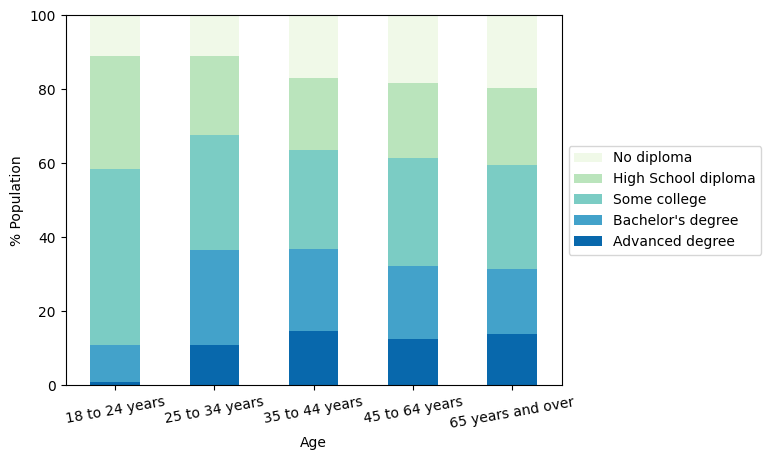

In [6]:
ax = df2.plot(
    kind = 'bar', stacked = True, rot = 10, ylim=(0,100),
    xlabel = 'Age', ylabel = '% Population',
    color = my_colors,
    legend = 'reverse'
)

handles, labels = ax.get_legend_handles_labels()

## Let's try out a basic shift of the legend location first
#ax.legend(loc = 'upper left');

## That's no good - it undid our label reversal! This is where our handles, labels come in.
#print(f"What is inside the 'handles' and 'labels' anyway?\nHandles: {handles}\nLabels: {labels}")
#ax.legend(reversed(handles), reversed(labels), loc = 'upper left');

## It would be even better to put the legend outside the axis.
## Experiment with the bbox_to_anchor and loc arguments to understand how they work together.
#ax.legend(reversed(handles), reversed(labels), bbox_to_anchor = (0., 0., 1., 1.), loc = 'upper left');
#ax.legend(reversed(handles), reversed(labels), bbox_to_anchor = (0., 0.), loc = 'upper left');
#ax.legend(reversed(handles), reversed(labels), bbox_to_anchor = (1., 1.), loc = 'upper left');
#ax.legend(reversed(handles), reversed(labels), bbox_to_anchor = (1., 0.5), loc = 'upper left');
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor = (1., 0.5), loc = 'center left');

## Switching from bars to stairs, and customizing ticks

We've been plotting bar charts with our categorical index so far,
but it is originally a binned numerical variable with uneven bins.
The bar chart doesn't help us visualize that aspect of the data,
so let's swap to a stairs plot that uses the numerical age boundaries of the bins.

This may feel like an esoteric thing to want to do,
but it is the same plotting mechanism that could be used for any pre-computed binned data,
such as histograms.
In this section we will have reason to switch to entirely Matplotlib-native plotting.

In [7]:
## Note that we are relying somewhat dangerously here on the fact that these are already sorted
## It keeps the code simple, but for realistic data you may need more careful treatment
## Just for fun, here are two different ways to extract the lower bound age from each string
#bin_edges = df.index.map(lambda x: int(x.split()[0])).values
bin_edges = [int(x.split()[0]) for x in df.index.values]
bin_edges

[18, 25, 35, 45, 65]

In [8]:
df3 = pd.DataFrame(df2, copy=True)
df3.index = df3.index.map(lambda x: int(x.split()[0]))
df3.drop(["No diploma"], axis=1, inplace=True)
df3.head()

,Advanced degree,Bachelor's degree,Some college,High School diploma
age,,,,
18,0.738296,9.987076,47.853875,30.384257
25,10.713565,25.769991,31.081288,21.471418
35,14.623810,22.270633,26.675147,19.605535
45,12.504740,19.669680,29.163347,20.241137
65,13.672428,17.787053,28.138288,20.696619


If I am trying to avoid looping over my stacked columns by hand, I might try something like below.
It is pretty convenient, but there are at least two disadvantages:
* The final bin (65 years and over) is cut off; all you get is the tiny uptick or downtick
* Less critically, there is no easy option to "fill" between lines when using variations of `drawstyle="steps"`

Customizing tick locations to emphasize the bin edges is as easy as another argument!

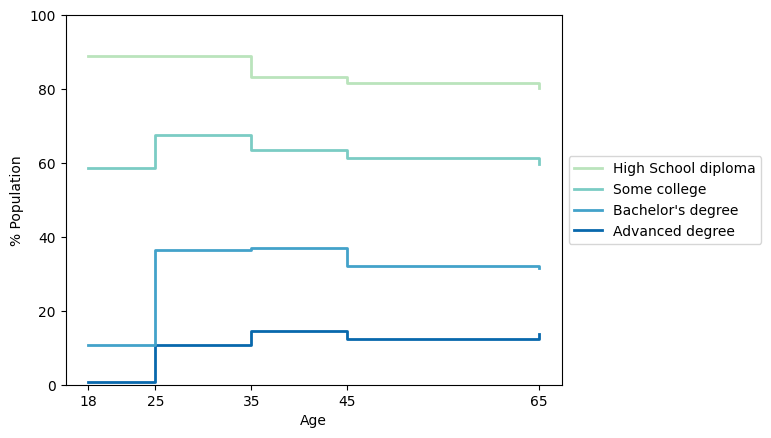

In [9]:
ax = df3.plot(
    drawstyle = "steps-post", stacked = True, ylim = (0, 100),
    xticks = bin_edges,
    xlabel = 'Age', ylabel = '% Population',
    color = my_colors, lw=2,
    legend = 'reverse'
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor = (1., 0.5), loc = 'center left');

To see the last bin, we have to decide an arbitrary max age here - let's go with 80.
Now, we have `x` data that is one point longer than our `y` data,
which is very common in binning scenarios.
Pandas doesn't have a nice way of handling pre-binned data like this,
so now we must make the leap to fully Matplotlib-native plotting.

This will give you an appreciation for how nice pandas is for stacked data in particular.
Our code is starting to resemble some of the long examples you might find in the wild;
is it clear how we got here and why?

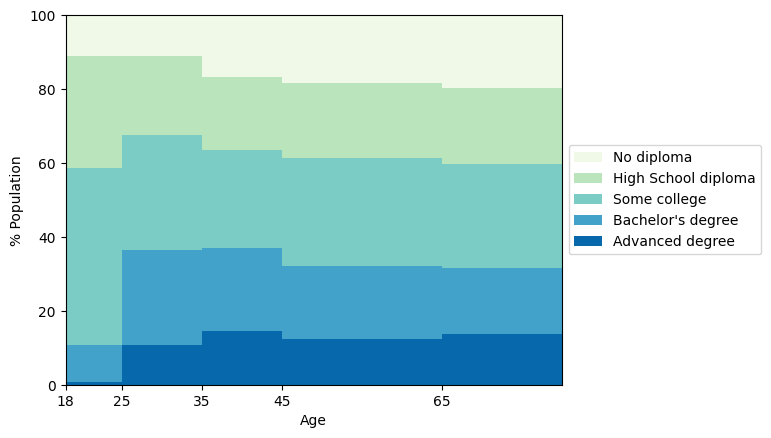

In [10]:
max_age = 80
bin_edges2 = bin_edges + [max_age]

# Set up the figure and axes
fig, ax = plt.subplots()

# We will need to keep track of the "baseline" for stacking ourselves now
baseline = np.zeros(len(bin_edges))

# Loop over the sorted categories
# Now it doesn't matter if the dataframe columns are sorted or not
for i, ed in enumerate(education_sorted):
    y = baseline + df[ed].values
    # Notice that we have to supply the label explicitly
    ax.stairs(y, edges = bin_edges2, baseline = baseline,
              color = my_colors[i], fill = True, label = ed)
    # Current y values become the next baseline
    baseline = y

# Set some things that we used to provide as kwargs to df.plot()
ax.set_xlabel('Age')
ax.set_ylabel('% Population')
ax.set_ylim(0, 100)
# Notice that I am still using bin_edges, not bin_edges2
# This is a subtle but deliberate choice, to avoid putting a tick at max_age
ax.set_xticks(bin_edges)

# Now that the plot is filled, it is nice to trim the x limits as well
ax.set_xlim(bin_edges[0], max_age)

# Same legend operations as usual
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor = (1., 0.5), loc = 'center left');

## Final plot: split by sex and add annotations

For the final plot in the notebook, let's add one more dimension.
We can look at the census data split by sex, and build off of our previous plot to accomplish a few new things:
* Leverage line styling to differentiate the new split
* Clarify legend entries across the different dimensions
* Add annotations to draw attention to the "main point" of the data

In [11]:
# We have two separate files, so we'll work with a dictionary of dataframes
sex_splits = ['Male', 'Female']
df_splits = {}
for s in sex_splits:
    csv_path = f'census-data/education_by_age_{s.lower()}.csv'
    df_splits[s] = pd.read_csv(csv_path, index_col='age')
df_splits['Female'].head()

,Advanced degree,Bachelor's degree,High School diploma,No diploma,Some college
age,,,,,
18 to 24 years,0.843348,11.841445,27.258273,9.278732,50.778201
25 to 34 years,12.307472,28.058851,18.707952,9.392708,31.533017
35 to 44 years,15.880987,23.449511,17.737680,15.796757,27.135066
45 to 64 years,12.123750,20.050869,19.489121,17.926073,30.410187
65 years and over,10.625986,16.246803,23.104526,21.365580,28.657105


First, let's just take care of the split by sex.
Notice how the line style is defined in a dictionary,
so we can just loop over Male and Female
rather than having two copies of everything in the main education loop.

It looks OK, but the legend is pretty busy!

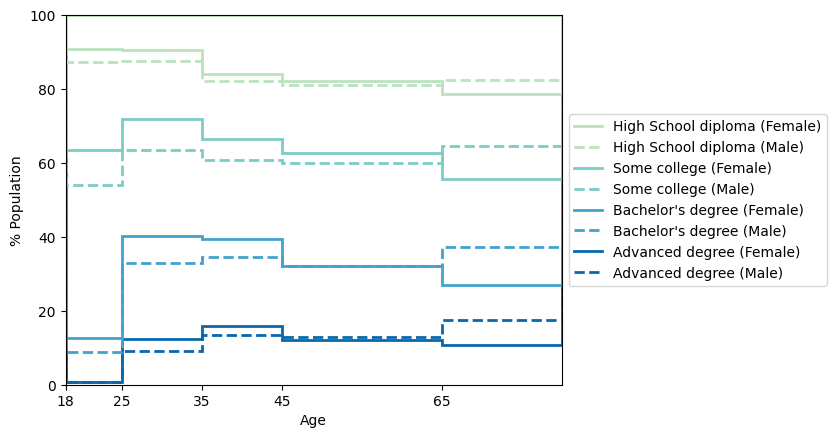

In [12]:
fig, ax = plt.subplots()

# Now we will need different baselines for each split
baseline_splits = {s: np.zeros(len(bin_edges)) for s in sex_splits}

# We will also separate sex by linestyle
# Define these once here so we can loop over male and female
sex_linestyles = {'Male': '--', 'Female': '-'}

# Skip the last category since we are no longer filling the plot
for i, ed in enumerate(education_sorted[:-1]):
    for s in sex_splits:
        y = baseline_splits[s] + df_splits[s][ed].values
        ax.stairs(y, edges = bin_edges2, baseline = baseline,
                  color = my_colors[i], lw=2,
                  ls = sex_linestyles[s], label=f'{ed} ({s})')
        baseline_splits[s] = y

ax.set_xlabel('Age')
ax.set_ylabel('% Population')
ax.set_ylim(0, 100)
ax.set_xticks(bin_edges)
ax.set_xlim(bin_edges[0], max_age)

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor = (1., 0.5), loc = 'center left');

For the final set of edits, we want to fix the legend, and then add some annotations.
Another section of the legend guide covers this scenario, which gets
[a bit more complicated](https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#multiple-legends-on-the-same-axes).

We'll also add some annotations, to highlight when
[Title IX](https://en.wikipedia.org/wiki/Title_IX)
was passed, banning sex-based discrimination in any US federally funded education programs.
This census data is from 2019, so people aged 52-65 would have been public school aged
("K-12") when Title IX was passed in 1972.
Based on this plot, there seems to be a clear difference in educational outcomes
"before" and "after" Title IX!

Now is a good time to remind you that these examples are designed
to focus on plotting techniques, NOT on data analysis techniques.
Clear annotations are very helpful in good data storytelling,
but there are plenty of reasons this simple census data from 2019
may not be the best data for the "story" we are presenting here.

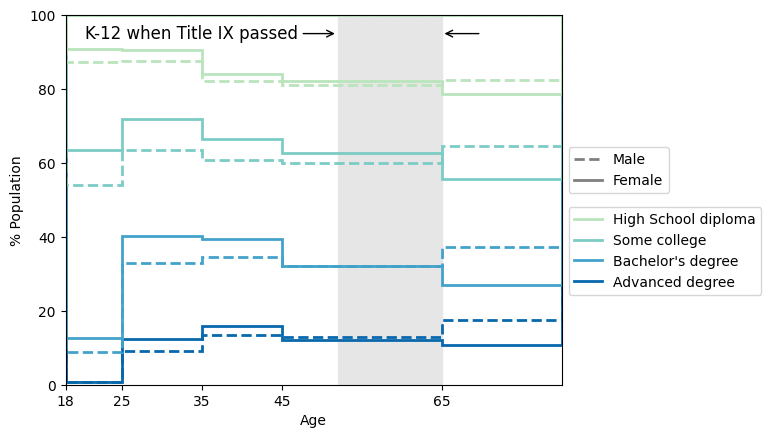

In [13]:
# We're importing a line artist class explicitly to help with the legend
from matplotlib.lines import Line2D

fig, ax = plt.subplots()

baseline_splits = {s: np.zeros(len(bin_edges)) for s in sex_splits}
sex_linestyles = {'Male': '--', 'Female': '-'}
all_linewidth = 2

# Store handles for the education legend
legend_handles_ed = []
for i, ed in enumerate(education_sorted[:-1]):
    ed_line_props = dict(color = my_colors[i], lw = all_linewidth)
    legend_handles_ed.append(Line2D([], [], label = ed, **ed_line_props))
    for s in sex_splits:
        y = baseline_splits[s] + df_splits[s][ed].values
        ax.stairs(y, edges = bin_edges2, baseline = baseline,
                  ls = sex_linestyles[s], **ed_line_props)
        baseline_splits[s] = y

# Store handles for the male vs female legend separately
legend_handles_s = []
for s in sex_splits:
    legend_handles_s.append(
        Line2D([], [], label = s,ls = sex_linestyles[s],
               lw = all_linewidth, color = '0.5'))

ax.set_xlabel('Age')
ax.set_ylabel('% Population')
ax.set_ylim(0, 100)
ax.set_xticks(bin_edges)
ax.set_xlim(bin_edges[0], max_age)

# Following https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#multiple-legends-on-the-same-axes
first_legend = ax.legend(handles = legend_handles_s, bbox_to_anchor = (1., 0.5), loc = 'lower left')
ax.add_artist(first_legend)

# Now add main legend
legend_handles_ed.reverse()
ax.legend(handles = legend_handles_ed, bbox_to_anchor = (1., 0.5), loc = 'upper left');


### Now add annotations!
# There are many, many options here.
# See https://matplotlib.org/stable/tutorials/text/annotations.html
# Define text and arrow properties once, and use for both arrows
my_text_props = dict(va='center', fontsize='large')
my_arrow_props = dict(facecolor='k', arrowstyle='->')
# x,y coordinates of arrow points and text are defined by hand here
ax.annotate('K-12 when Title IX passed', xy = (52, 95), xytext = (47,95),
            ha='right', arrowprops = my_arrow_props, **my_text_props)
ax.annotate('', xy = (65, 95), xytext = (70,95),
            ha='left', arrowprops = my_arrow_props, **my_text_props)

# To create a shaded region, try out a new function "axvspan"
# It covers the data by default..
#ax.axvspan(52, 65, color='0.9')

# One way to fix is with alpha, making it transparent
#ax.axvspan(52, 65, color='0.5', alpha=0.2)

# Another way is with zorder (see https://matplotlib.org/stable/gallery/misc/zorder_demo.html)
ax.axvspan(52, 65, color='0.9', zorder=-1)

# Save to file
fig.savefig('plots/part-2-after.png', bbox_inches='tight')

## Where to go from here?

We have gone over several example plots and customizations,
including color choice, legend formatting, plotting binned data, and annotations.

Along the way, we've highlighted some tips for more advanced mixing and matching
of Pandas and Matplotlib methods,
including some tips for navigating the documentation.

But there are many other topics to explore,
so the next notebook will look at a slightly different slice of census data
(per-county population statistics in California)
to expand our range of examples.